<a href="https://colab.research.google.com/github/Sirfowahid/Concrete_Compressive_Strength_Analysis_Using_ML/blob/main/CCSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-3-22e9b1a8b4d2>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Projects/01. Concrete Compressive Strength Analysis using Machine Learning/M_482.csv')

In [5]:

data.head()

,Water,Cement,Fine Aggregate,Coarse Aggregate,Hearthstone,Fly Ash,Super Plasticizer,Actual Concrete Strength
0,133.0,306.0,868.0,866.0,16.1,191.0,20.6,51.0
1,156.0,377.0,818.0,816.0,19.8,180.0,16.5,55.0
2,180.0,447.0,768.0,766.0,23.6,169.0,11.7,51.0
3,141.0,291.0,868.0,866.0,15.3,191.0,18.3,45.0
4,164.0,360.0,818.0,816.0,18.9,180.0,14.1,52.0


In [6]:
X = data.drop('Actual Concrete Strength ',axis=1)

In [7]:
X.head()

,Water,Cement,Fine Aggregate,Coarse Aggregate,Hearthstone,Fly Ash,Super Plasticizer
0,133.0,306.0,868.0,866.0,16.1,191.0,20.6
1,156.0,377.0,818.0,816.0,19.8,180.0,16.5
2,180.0,447.0,768.0,766.0,23.6,169.0,11.7
3,141.0,291.0,868.0,866.0,15.3,191.0,18.3
4,164.0,360.0,818.0,816.0,18.9,180.0,14.1


In [8]:
y = data['Actual Concrete Strength ']

In [9]:
X.describe()

,Water,Cement,Fine Aggregate,Coarse Aggregate,Hearthstone,Fly Ash,Super Plasticizer
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,185.000228,280.774564,829.705996,854.319087,74.750975,91.501183,4.500290
std,29.178277,91.716982,176.109870,144.713529,79.494542,68.295595,4.094371
min,116.500000,74.000000,30.000000,436.000000,0.000000,0.000000,0.000000
25%,164.215000,211.700000,746.850000,771.325000,0.000000,42.125000,0.000000
50%,178.000000,270.000000,859.700000,830.000000,51.025000,87.600000,4.390000
75%,206.900000,332.150000,940.000000,963.400000,120.000000,137.000000,6.715000
max,255.000000,599.000000,1293.000000,1226.000000,375.000000,330.000000,27.170000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

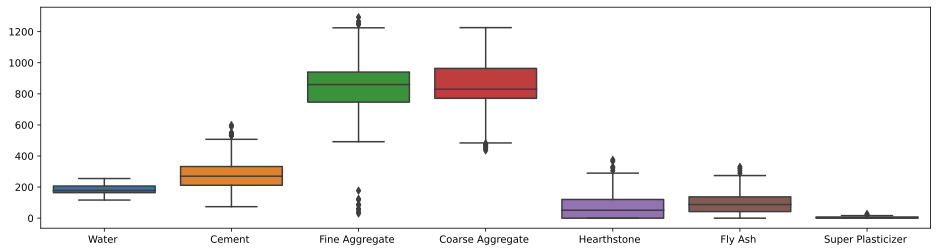

In [10]:
from google.colab import files
plt.figure(figsize=(16,4))
sns.boxplot(X)
plt.savefig('boxplot_without_normalization.png')
files.download('boxplot_without_normalization.png')
plt.show()

In [11]:
from google.colab import files
plt.figure(figsize=(16,16))
sns.pairplot(X)
#plt.savefig('pairplot.png')
#files.download('pairplot.png')
plt.show()

<Figure size 1600x1600 with 0 Axes>

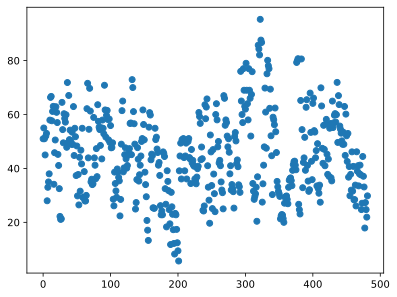

In [12]:
plt.scatter(np.arange(y.shape[0]),y)
plt.show()

In [13]:
X.corr()

,Water,Cement,Fine Aggregate,Coarse Aggregate,Hearthstone,Fly Ash,Super Plasticizer
Water,1.000000,0.320207,-0.119241,-0.429396,-0.005954,-0.354548,-0.565196
Cement,0.320207,1.000000,-0.394260,-0.056856,-0.164208,-0.215827,0.092564
Fine Aggregate,-0.119241,-0.394260,1.000000,-0.608448,-0.084657,0.104525,0.075095
Coarse Aggregate,-0.429396,-0.056856,-0.608448,1.000000,0.068918,-0.022099,0.068081
Hearthstone,-0.005954,-0.164208,-0.084657,0.068918,1.000000,-0.569097,0.105018
Fly Ash,-0.354548,-0.215827,0.104525,-0.022099,-0.569097,1.000000,0.267591
Super Plasticizer,-0.565196,0.092564,0.075095,0.068081,0.105018,0.267591,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

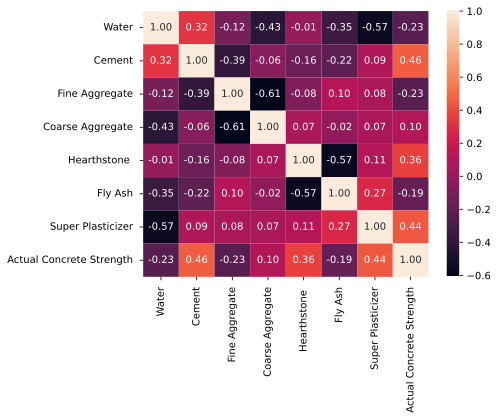

In [14]:

sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.savefig('correlation_heatmap.png')
files.download('correlation_heatmap.png')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X = scaler.fit_transform(X)

In [17]:
features = []
for i in data.columns:
  features.append(i)

In [18]:
features

['Water ',
 'Cement ',
 'Fine Aggregate ',
 'Coarse Aggregate ',
 'Hearthstone  ',
 'Fly Ash ',
 'Super Plasticizer ',
 'Actual Concrete Strength ']

In [19]:
norm_data = pd.DataFrame(X)

In [20]:
norm_data

,0,1,2,3,4,5,6
0,-1.784007,0.275321,0.217670,0.080801,-0.738565,1.458398,3.936242
1,-0.994931,1.050246,-0.066539,-0.265068,-0.691973,1.297167,2.933827
2,-0.171546,1.814257,-0.350748,-0.610937,-0.644121,1.135935,1.760268
3,-1.509546,0.111605,0.217670,0.080801,-0.748639,1.458398,3.373912
4,-0.720469,0.864701,-0.066539,-0.265068,-0.703306,1.297167,2.347047
...,...,...,...,...,...,...,...
477,-0.664891,-0.939673,0.433100,1.052140,-0.941305,0.132193,0.728514
478,0.116638,-0.320934,-0.409124,1.204461,-0.941305,0.392362,0.452238
479,-0.189386,-1.153378,-0.472389,1.069295,0.390986,0.729337,-0.552622
480,0.411341,-0.269964,-0.183974,1.026546,-0.873306,-0.201557,0.638052


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

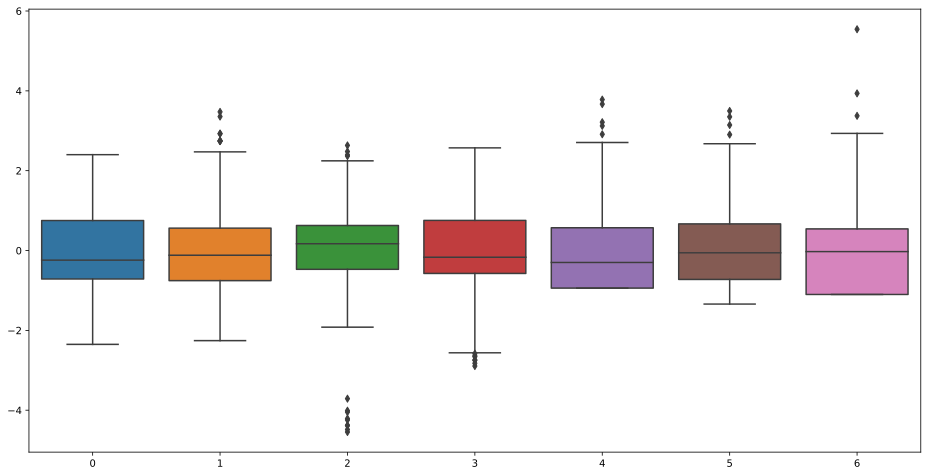

In [21]:
plt.figure(figsize=(16,8))
sns.boxplot(X)
plt.savefig('boxplot_with_normalization.png')
files.download('boxplot_with_normalization.png')
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [23]:
yhat = lr.predict(X)
print(yhat)

[59.50272624 62.05724652 64.0976541  55.30901889 57.61367931 59.21334257
 41.45172932 41.90354888 42.8109371  43.51062058 55.3507512  57.0157098
 60.9758983  55.3507512  57.0157098  60.9758983  55.3507512  57.0157098
 60.9758983  64.94832034 62.69515278 66.91535082 44.61467765 42.97470657
 41.33618599 45.26493259 45.14106726 44.83277312 52.91633995 48.08759018
 43.93663915 48.64158289 54.52714526 42.75602053 49.63307787 47.65008792
 50.85127727 46.43188851 48.41646525 48.86670054 44.69154907 49.92409637
 39.46068712 45.57250341 43.81059473 47.04821933 42.3348788  44.4914445
 44.89165364 40.36749202 45.27115729 35.45907776 41.1839066  39.5342239
 42.58417587 38.17489923 40.17989398 40.55509005 57.91480037 30.48339123
 36.39475335 41.65781548 39.72406566 35.59046737 31.13714389 63.0824398
 64.56723096 45.07749897 59.2585381  66.62340905 59.48163047 45.48340442
 37.11702209 34.44998723 49.19134196 61.89073644 45.04748329 43.61962125
 42.2593876  45.83564027 39.23835225 66.21505743 62.4418

In [24]:
lr_predict_100 = pd.DataFrame(yhat)
lr_predict_100.head()

,0
0,59.502726
1,62.057247
2,64.097654
3,55.309019
4,57.613679


In [25]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)

In [26]:
ytrain_pred = lr.predict(X_train)
ytrain_pred_70 = pd.DataFrame(ytrain_pred)
ytrain_pred_70.to_csv('ytrain_pred_70_lr.csv')
print(ytrain_pred)

[55.30901889 38.7193887  60.55639572 36.39475335 56.40222522 51.61891764
 51.29952479 48.08759018 38.03489992 31.07487404 45.14106726 41.90354888
 53.80662201 43.60549463 46.43188851 63.39632175 49.49289408 68.75277662
 26.38907265 45.63530606 36.92865747 51.43009243 24.14350532 27.13500378
 36.12269975 45.8010878  36.01724484 58.24480314 45.69642116 20.79765063
 45.07749897 45.1242156  56.23845091 27.50273181 29.62244017 40.5521389
 39.63945648 47.04821933 38.59643209 58.8791166  41.30958632 39.50697438
 38.74922637 58.6686926  31.60003976 28.66303806 54.26289195 52.6715375
 49.19134196 46.04059833 23.25023216 43.2600641  46.38717854 49.37360291
 37.94653212 49.20840173 31.03099625 41.30548272 38.03629545 63.05812122
 31.31422412 29.07819915 50.85127727 30.01938583 42.32780349 20.75518708
 35.23323366 45.81426257 32.3040709  30.48339123 55.71321779 44.2400714
 29.10799397 41.45172932 46.40435522 62.61025029 62.70886869 52.60226457
 21.89976579 31.80704744 40.52975343 39.85994685 55.35

In [27]:
ytest_pred = lr.predict(X_test)
ytest_pred_70 = pd.DataFrame(ytest_pred)
ytest_pred_70.to_csv('ytest_pred_70_lr.csv')
print(ytest_pred)

[64.80048433 30.85892275 40.34324886 39.46237248 59.99113334 64.84562111
 35.56142629 56.25012876 30.9386397  35.96197834 43.51062058 23.70214487
 30.93971699 66.03573762 38.71149222 45.39401929 56.78210139 43.93663915
 29.28729908 63.33921123 26.61580989 30.01960349 36.57515564 38.37397662
 42.75602053 26.3276967  31.36235504 39.84438567 43.61962125 59.48163047
 34.44998723 38.17489923 50.85296262 42.2593876  59.50272624 57.0157098
 37.24618416 71.28812794 24.42690423 32.49771203 53.65733484 60.061933
 38.17489923 45.20759998 60.9758983  35.59046737 59.2585381  44.92350646
 45.27115729 48.86670054 39.26570647 42.74388197 37.34708858 38.2604971
 48.3667747  65.59947092 44.01498106 37.45478454 49.26723641 50.30751052
 26.29957594 40.55564781 44.45133799 67.7352075  51.12232776 56.00951818
 32.74556094 62.44187502 39.68175264 38.69483509 25.12959989 37.11702209
 45.04748329 33.46197919 37.4597755  45.83564027 23.80994797 21.00904029
 24.94699463 66.19149444 49.10041903 29.05489999 56.879

In [28]:
lr_predict_100.to_csv('lr_predict_100.csv')

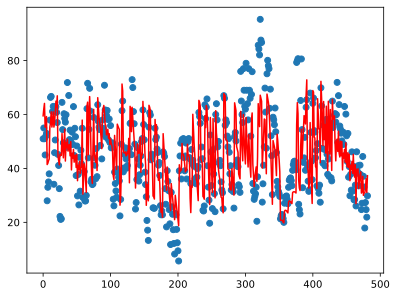

In [29]:
plt.scatter(np.arange(y.shape[0]),y)
plt.plot(yhat,c='r')
plt.show()

In [30]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [31]:
def validate(y,yhat):
  r2 = r2_score(y,yhat)
  rmse = np.sqrt(mean_squared_error(y,yhat))
  mae = mean_absolute_error(y,yhat)
  print(f'actual sd: {np.std(y)}& pred sd: {np.std(yhat)}')
  print(f'r2:{r2} rmse:{rmse} mae:{mae}')


In [32]:
type(y)

pandas.core.series.Series

In [33]:
type(yhat)

numpy.ndarray

In [34]:
validate(y,yhat)

actual sd: 15.315746172537962& pred sd: 11.922678414282885
r2:0.6059982077684273 rmse:9.613626800079361 mae:7.708313591252136


In [35]:

lr.coef_

array([-7.02206054,  9.86331178, -1.51041057, -2.43640244,  7.57738978,
        0.91373029,  1.02306507])

In [36]:
lr.score(X,y)

0.6059982077684273

In [37]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X,y)

SVR()

In [38]:
svr.score(X,y)

0.5459177381094373

In [39]:
yhat = svr.predict(X)
print(yhat)

[47.82028477 50.89283956 51.75493888 48.56464298 51.51370218 50.91107373
 45.72535461 45.64608886 43.33816167 42.33284624 50.78926436 53.42358505
 52.45671428 50.78926436 53.42358505 52.45671428 50.78926436 53.42358505
 52.45671428 48.82330617 48.99414    45.70828614 42.70694378 42.22925208
 41.48337486 42.90379598 42.88067733 42.62293014 53.74443687 51.18129189
 45.72383386 49.53972208 55.56247354 43.64452927 48.81786762 48.52102695
 51.19111851 47.50466151 48.31740909 50.62169747 45.00998876 50.13255132
 40.83197883 44.3099715  45.69588038 46.6689281  43.01686677 43.77832045
 46.19415832 40.84939113 45.7082845  37.78005551 39.74162334 42.98597052
 42.61886195 39.07593906 39.67600427 42.03058315 50.92611045 29.32024046
 36.52175577 41.47823017 38.81620903 36.67682729 31.42266858 56.59614297
 54.62944565 45.17806774 56.16540711 61.26037233 58.82175987 43.26122483
 38.14840555 34.24051678 45.27818278 60.44189577 45.05318133 44.50032202
 43.47093312 47.24996205 38.30534376 58.28012373 58

In [40]:
ytrain_pred = svr.predict(X_train)
ytrain_pred_70 = pd.DataFrame(ytrain_pred)
ytrain_pred_70.to_csv('ytrain_pred_70_svr.csv')
print(ytrain_pred)

[48.56464298 38.5345093  59.21157496 36.52175577 51.02557518 51.85109045
 52.4656097  51.18129189 40.12967178 39.15906097 42.88067733 45.64608886
 53.17378002 41.36912389 47.50466151 51.90857336 47.96928255 62.53284856
 30.14910708 46.18517705 38.31992996 52.43213699 31.90848326 35.71815557
 37.85504407 42.42619409 41.3313216  55.93490222 43.16624304 30.77376559
 45.17806774 43.53914947 50.94921995 33.22935538 32.24428047 40.73944359
 38.55385349 46.6689281  38.41960431 50.00258452 40.89748878 39.96168134
 39.63214121 55.38956014 35.1103358  33.16386226 48.64024671 43.39142294
 45.27818278 44.34394387 26.76843922 44.0316225  45.83318591 47.73829506
 40.83103749 51.49414928 35.41046955 39.55752174 41.1203238  55.42297346
 35.80062718 35.70965609 51.19111851 29.79177663 41.40007803 31.02564478
 38.74018973 46.71771883 38.98237521 29.32024046 53.02086703 38.5628695
 30.68779196 45.72535461 41.33313161 59.39110569 53.87882506 45.11311523
 28.78461887 36.90678357 35.11800992 44.99363357 50.

In [41]:
ytest_pred = svr.predict(X_test)
ytest_pred_70 = pd.DataFrame(ytest_pred)
ytest_pred_70.to_csv('ytest_pred_70_svr.csv')
print(ytest_pred)

[55.88024039 40.98063723 39.09728544 40.83365096 56.35536141 45.98688429
 37.90289358 51.79573243 37.70856637 38.86896366 42.33284624 25.22392086
 35.78366449 53.49112002 39.10271951 42.38612022 53.15659947 45.72383386
 31.86461739 59.06501139 28.46091489 36.98988151 32.75001    41.72718754
 43.64452927 38.85896515 34.28041822 44.13117167 44.50032202 58.82175987
 34.24051678 39.07593906 51.19180726 43.47093312 47.82028477 53.42358505
 39.70554392 59.82564152 31.55039776 39.05194997 52.01692331 49.65364672
 39.07593906 45.09208298 52.45671428 36.67682729 56.16540711 45.10559788
 45.7082845  50.62169747 41.63847024 45.58874698 32.1230233  38.66056475
 41.95557478 61.10511507 43.11712335 41.40960903 52.53370173 51.17685235
 27.0213735  38.30840924 42.20155816 55.65843195 46.34501114 58.01255431
 31.76839976 58.3085844  44.16720228 43.72095482 31.59642354 38.14840555
 45.05318133 38.47180849 39.76848347 47.24996205 32.83500459 29.18844447
 29.72837982 62.2574915  46.93709871 27.52432402 57

In [42]:
svr_predict_100 = pd.DataFrame(yhat)
svr_predict_100.to_csv('svr_predict_100.csv')

In [43]:
validate(y,yhat)

actual sd: 15.315746172537962& pred sd: 8.225303203505055
r2:0.5459177381094373 rmse:10.320611466180338 mae:7.765276005130572


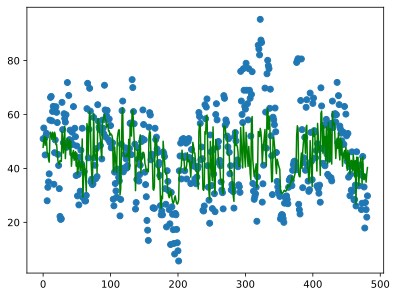

In [44]:
plt.scatter(np.arange(y.shape[0]),y)
plt.plot(yhat,c='g')
plt.show()

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(X,y)

RandomForestRegressor()

In [46]:
rfg.score(X,y)

0.9643518354515493

In [47]:
rfg.feature_importances_

array([0.10057637, 0.25179769, 0.13660653, 0.08118102, 0.1459004 ,
       0.05131427, 0.23262372])

In [48]:
sum(rfg.feature_importances_)

1.0

In [49]:
yhat = rfg.predict(X)
print(yhat)


[48.48948333 55.41191071 53.4991125  46.25264    52.64017667 54.4142675
 32.19315    36.35756167 39.126805   39.0383     50.43749333 57.1140231
 60.02365607 50.43749333 57.1140231  60.02365607 50.43749333 57.1140231
 60.02365607 61.33741667 59.48041667 56.02982667 43.61938    40.7521
 35.9494     26.9953     28.19043333 26.53128    61.75       55.5296
 48.6082     59.0526     57.509      55.5988     58.7579     50.9841
 69.88540667 50.6421     63.158      54.4817     53.2921     49.7024
 49.4599     52.7994     49.0815     61.99273333 45.9909     51.18101333
 51.476      37.94981    43.61422571 29.88592667 38.10656762 30.60709
 45.16704333 32.28246667 42.71151    41.72251667 53.2581     28.8443
 33.27036    41.9991     32.1514     30.783      32.16693333 62.1918
 74.5504     44.1042     53.3582     66.8425     60.0097     38.6424
 37.16973333 36.33018333 38.951      60.1847     44.0513     42.1627
 39.6065     48.7142     36.36927    61.4545     57.3615     55.3427
 53.0385     49.1045

In [50]:
ytrain_pred = rfg.predict(X_train)
ytrain_pred_70 = pd.DataFrame(ytrain_pred)
ytrain_pred_70.to_csv('ytrain_pred_70_rfg.csv')
print(ytrain_pred)

[46.25264    44.3693     72.6522     33.27036    42.5998     53.895
 52.7535     55.5296     39.9811     18.8741     28.19043333 36.35756167
 62.5091     34.2115     50.6421     57.0136     57.8258     65.2365
 23.5968     58.13208333 33.7867     46.151      26.9205     35.7021
 29.3183     40.79826667 43.505      58.4727     43.87202    22.7489
 44.1042     50.869      50.9072     32.7489     25.744      57.187
 33.2905     61.99273333 44.6637     50.3914     36.5382     47.0653
 32.34853333 55.3427     37.7295     25.7744     44.5034     35.1601
 38.951      61.3379     13.1762     43.8494     40.547      39.2455
 36.9019     55.0038     39.4426     39.8053     49.3442     56.9581
 41.135      34.938      69.88540667 23.3076     40.813925   22.6374
 38.0545     48.73493333 38.7174     28.8443     40.3771     36.9098
 25.6673     32.19315    32.2209     76.1969     59.6107     48.8254
 22.346925   24.7039     38.5397     47.2569     50.43749333 35.0801
 49.502      61.4545     63.158 

In [51]:
ytest_pred = rfg.predict(X_test)
ytest_pred_70 = pd.DataFrame(ytest_pred)
ytest_pred_70.to_csv('ytest_pred_70_rfg.csv')
print(ytest_pred)

[57.128      28.4352     34.7536     49.4725     75.6879     58.6726
 27.8435     43.224      24.0315     35.0216     39.0383     23.5731
 32.9088     86.9512     44.9722     51.3638     53.0385     48.6082
 25.5932     54.5445     24.8348     32.2074     33.4653     31.60366
 55.5988     24.9747     31.1937     41.7128     42.1627     60.0097
 36.33018333 32.28246667 69.90290667 39.6065     48.48948333 57.1140231
 31.157      61.9357     29.3445     35.1888     47.4761     47.0199
 32.28246667 42.2668     60.02365607 30.783      53.3582     42.26826667
 43.61422571 54.4817     36.2035     49.74       33.3965     34.0551
 56.2259     63.118      43.2215     41.3329     48.2592     57.3176
 18.0507     56.4429     43.6021     65.9451     52.62336    55.5447
 25.1305     57.3615     44.6081     39.3399     30.4257     37.16973333
 44.0513     41.9978     35.0613     48.7142     28.4487      9.209
 24.116      77.0105     48.2495     23.9367     64.673      60.1847
 49.6518     60.0236560

In [52]:
rf_predict_100 = pd.DataFrame(yhat)
rf_predict_100.to_csv('rf_predict_100.csv')

In [53]:
validate(y,yhat)

actual sd: 15.315746172537962& pred sd: 13.94277638618257
r2:0.9643518354515493 rmse:2.8917233850424324 mae:2.0458741283837187


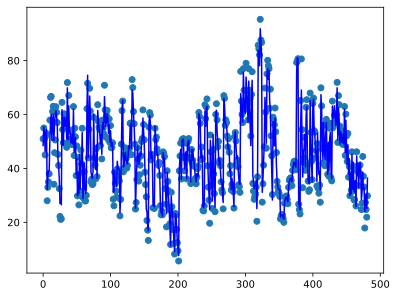

In [54]:
plt.scatter(np.arange(y.shape[0]),y)
plt.plot(yhat,c='b')
plt.show()

In [55]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=None)

In [56]:
def kfold(model,X,Y):
  for train_idx,test_idx in kf.split(X):
    X_train,X_test = X[train_idx,:],X[test_idx,:]
    y_train,y_test = Y.iloc[train_idx],Y.iloc[test_idx]

    model.fit(X_train,y_train)
    print('Fold:')
    yhat = model.predict(X_test)
    validate(y_test,yhat)

    print()


In [57]:
kfold(svr,X,y)

Fold:
actual sd: 12.495097790992348& pred sd: 5.589912655483601
r2:0.4027779476897364 rmse:9.6562294578475 mae:7.591886850618885

Fold:
actual sd: 13.199715613351497& pred sd: 7.787286229089411
r2:0.4451510460442758 rmse:9.832228439319847 mae:7.718883074342719

Fold:
actual sd: 13.508706938528263& pred sd: 6.72793359146696
r2:0.5684253162982498 rmse:8.874456409672261 mae:7.199752205274525

Fold:
actual sd: 20.773319156823078& pred sd: 5.262799379270644
r2:0.14922131458954835 rmse:19.160824543895288 mae:16.298508267653713

Fold:
actual sd: 12.558655407767253& pred sd: 6.695434960956033
r2:0.3479529426180703 rmse:10.141042757357486 mae:8.477924659603424



In [58]:
kfold(rfg,X,y)

Fold:
actual sd: 12.495097790992348& pred sd: 8.407156326422697
r2:0.45668661460750504 rmse:9.210110945585832 mae:6.643207216494847

Fold:
actual sd: 13.199715613351497& pred sd: 11.765513424022144
r2:0.6507962038425524 rmse:7.800169723527099 mae:5.903141666666667

Fold:
actual sd: 13.508706938528263& pred sd: 11.084241433655711
r2:0.7193012480271168 rmse:7.157049500322416 mae:5.641048732638886

Fold:
actual sd: 20.773319156823078& pred sd: 10.022378878491462
r2:0.2857185080492284 rmse:17.55660717907919 mae:14.224984982638892

Fold:
actual sd: 12.558655407767253& pred sd: 10.477893726117651
r2:0.014184040203244597 rmse:12.46927108146898 mae:9.18083222718254



In [59]:
def split_test(model,X,Y):
  for i in range(2,8):
    Xs = X[:,:i]
    model.fit(Xs,Y)
    print(f'with first {i} colums')
    yhat = model.predict(Xs)
    validate(Y,yhat)
    print()

In [60]:
split_test(svr,X,y)

with first 2 colums
actual sd: 15.315746172537962& pred sd: 7.722452656723268
r2:0.36145507181466696 rmse:12.238660568155318 mae:9.818197438113732

with first 3 colums
actual sd: 15.315746172537962& pred sd: 6.7426625707313415
r2:0.3727077014662642 rmse:12.130344584983137 mae:9.781227262006007

with first 4 colums
actual sd: 15.315746172537962& pred sd: 6.49550233861347
r2:0.44472855130763855 rmse:11.412763869483927 mae:9.12386566705436

with first 5 colums
actual sd: 15.315746172537962& pred sd: 8.11665387407712
r2:0.5547947615493855 rmse:10.21923280760558 mae:7.779996742597414

with first 6 colums
actual sd: 15.315746172537962& pred sd: 7.679284457233309
r2:0.5248082903204709 rmse:10.5577795074867 mae:8.019760096139672

with first 7 colums
actual sd: 15.315746172537962& pred sd: 8.225303203505055
r2:0.5459177381094373 rmse:10.320611466180338 mae:7.765276005130572



In [61]:
split_test(rfg,X,y)

with first 2 colums
actual sd: 15.315746172537962& pred sd: 13.142483425805622
r2:0.8800802813857089 rmse:5.303755077951504 mae:3.836633714257734

with first 3 colums
actual sd: 15.315746172537962& pred sd: 13.25133106889101
r2:0.9219704789538797 rmse:4.27826449828691 mae:3.112305293884309

with first 4 colums
actual sd: 15.315746172537962& pred sd: 13.540890304172471
r2:0.9370609202052679 rmse:3.842362673206126 mae:2.7473031126541176

with first 5 colums
actual sd: 15.315746172537962& pred sd: 13.859987264265223
r2:0.9592679219749269 rmse:3.091052943339796 mae:2.1530588403971547

with first 6 colums
actual sd: 15.315746172537962& pred sd: 13.836087661640137
r2:0.9588793558845883 rmse:3.105761590154187 mae:2.1698694646973617

with first 7 colums
actual sd: 15.315746172537962& pred sd: 13.982345081792
r2:0.9660856568167552 rmse:2.820524428221099 mae:1.9804405263287892



In [62]:
import tensorflow as tf

In [63]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8,activation='relu',input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [64]:
ann.compile(optimizer='adam',loss='mse')

In [65]:
r = ann.fit(X,y,epochs=300)

Epoch 1/300
16/16 [==============================] - 2s 3ms/step - loss: 2256.0918
Epoch 2/300
16/16 [==============================] - 0s 2ms/step - loss: 2231.3372
Epoch 3/300
16/16 [==============================] - 0s 3ms/step - loss: 2191.6577
Epoch 4/300
16/16 [==============================] - 0s 2ms/step - loss: 2118.3350
Epoch 5/300
16/16 [==============================] - 0s 3ms/step - loss: 1979.5800
Epoch 6/300
16/16 [==============================] - 0s 2ms/step - loss: 1729.7832
Epoch 7/300
16/16 [==============================] - 0s 3ms/step - loss: 1327.5176
Epoch 8/300
16/16 [==============================] - 0s 3ms/step - loss: 833.5969
Epoch 9/300
16/16 [==============================] - 0s 2ms/step - loss: 525.3392
Epoch 10/300
16/16 [==============================] - 0s 2ms/step - loss: 439.1063
Epoch 11/300
16/16 [==============================] - 0s 2ms/step - loss: 377.9222
Epoch 12/300
16/16 [==============================] - 0s 2ms/step - loss: 336.7870
Epoch 

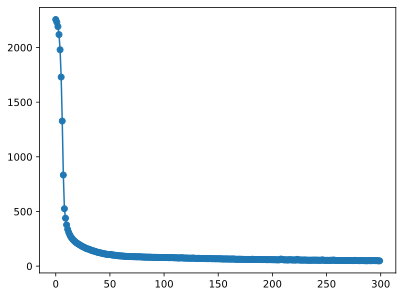

In [66]:
plt.plot(r.history['loss'],'o-')
plt.show()

In [67]:
X

array([[-1.78400712,  0.27532136,  0.21766974, ..., -0.73856531,
         1.45839849,  3.93624215],
       [-0.99493051,  1.05024618, -0.0665389 , ..., -0.69197288,
         1.29716659,  2.93382699],
       [-0.17154622,  1.81425657, -0.35074755, ..., -0.64412119,
         1.13593469,  1.76026779],
       ...,
       [-0.18938622, -1.15337807, -0.47238885, ...,  0.39098639,
         0.72933715, -0.55262181],
       [ 0.41134124, -0.26996377, -0.18397392, ..., -0.87330559,
        -0.20155721,  0.6380518 ],
       [-0.06176165, -0.4844324 , -0.12167538, ..., -0.14193031,
        -0.29932237,  0.26397981]])

In [68]:
yhat = ann.predict(X)

16/16 [==============================] - 0s 2ms/step


In [69]:
yhat = yhat.reshape(482)

In [70]:
X_train.shape[0]

337

In [71]:
ytrain_pred = ann.predict(X_train)
ytrain_pred = ytrain_pred.reshape(337)
ytrain_pred_70 = pd.DataFrame(ytrain_pred)
ytrain_pred_70.to_csv('ytrain_pred_70_ann.csv')
print(ytrain_pred)

11/11 [==============================] - 0s 2ms/step
[48.27517  43.55913  67.024704 43.340378 48.91547  51.76189  51.919827
 51.845097 35.569576 20.112516 27.806902 36.39426  56.483112 39.67824
 46.312176 59.060993 53.488377 67.64699  25.79273  52.03764  37.590748
 59.81708  27.131073 36.354298 34.481747 35.96841  39.093494 68.74429
 46.40045  23.918634 45.616547 48.25344  56.0924   31.98364  30.27474
 50.478374 33.626793 56.79066  43.17777  47.743397 29.16252  43.875797
 24.545216 56.027267 35.97481  22.744085 53.110756 38.28362  56.174156
 45.266926 14.75397  45.187885 43.976185 51.350346 37.814793 44.844616
 36.8644   39.00745  44.349865 63.665062 37.914738 36.323223 61.140717
 23.661707 43.695885 23.27518  36.56046  46.450138 39.454113 24.103748
 47.792892 41.054123 31.547665 33.67867  32.023216 67.64221  59.810886
 49.393673 20.247047 27.271944 32.39401  43.427036 49.32932  36.696842
 49.638187 61.72826  51.647003 60.342663 51.72035  40.204826 46.28642
 56.19857  18.32425  46.0124

In [72]:
ytest_pred = ann.predict(X_test)
ytest_pred_70 = pd.DataFrame(ytest_pred)
ytest_pred_70.to_csv('ytest_pred_70_ann.csv')
print(ytest_pred)

5/5 [==============================] - 0s 3ms/step
[[63.608913]
 [33.839497]
 [41.72008 ]
 [44.65978 ]
 [66.74602 ]
 [63.240017]
 [36.40162 ]
 [44.24752 ]
 [27.811373]
 [40.028843]
 [44.52067 ]
 [23.281431]
 [30.562136]
 [87.065704]
 [43.506702]
 [40.34818 ]
 [54.897404]
 [42.683872]
 [26.102617]
 [60.96021 ]
 [27.418402]
 [26.139277]
 [35.334347]
 [41.78375 ]
 [50.75655 ]
 [20.331274]
 [31.907518]
 [42.389812]
 [42.45647 ]
 [60.565018]
 [37.80288 ]
 [36.428936]
 [61.138863]
 [38.294178]
 [52.080135]
 [56.991455]
 [34.19356 ]
 [64.99489 ]
 [28.65524 ]
 [39.656384]
 [55.970676]
 [49.75788 ]
 [36.428936]
 [49.397614]
 [60.344418]
 [42.42923 ]
 [59.700787]
 [45.22925 ]
 [45.852863]
 [55.689617]
 [27.870142]
 [47.49849 ]
 [31.51924 ]
 [33.35756 ]
 [54.808052]
 [61.444225]
 [45.44026 ]
 [44.082195]
 [52.595367]
 [50.218304]
 [16.684166]
 [46.62414 ]
 [46.572567]
 [65.48592 ]
 [49.446262]
 [57.711033]
 [32.023335]
 [58.8557  ]
 [42.117493]
 [39.459923]
 [33.66456 ]
 [40.62137 ]
 [45.5116  ]


In [73]:
yhat

array([52.080135, 54.652805, 61.894016, 48.27517 , 52.991306, 61.283146,
       33.67867 , 36.39426 , 41.601315, 44.52067 , 49.32932 , 56.991455,
       60.344418, 49.32932 , 56.991455, 60.344418, 49.32932 , 56.991455,
       60.344418, 58.03971 , 58.740917, 53.51781 , 37.551754, 37.045444,
       33.58667 , 27.91622 , 27.806902, 29.700573, 58.968777, 51.845097,
       42.683872, 53.618233, 56.655666, 50.75655 , 53.2433  , 50.63952 ,
       61.140717, 46.312176, 51.647003, 55.689617, 50.164112, 52.67806 ,
       44.658596, 47.40948 , 46.41519 , 56.79066 , 42.185547, 47.9281  ,
       52.042717, 42.915707, 45.852863, 37.98582 , 40.088154, 37.956352,
       48.89651 , 36.428936, 40.595753, 45.163403, 56.497387, 24.103748,
       43.340378, 46.47776 , 42.432064, 42.42923 , 28.27368 , 67.32979 ,
       79.1146  , 45.616543, 59.700787, 71.62897 , 60.565018, 51.718784,
       40.62137 , 37.80288 , 56.174156, 62.680653, 45.5116  , 42.45647 ,
       38.294178, 50.357693, 30.971083, 61.72826 , 

In [74]:
ann_predict_100 = pd.DataFrame(yhat)
ann_predict_100.to_csv('ann_predict_100.csv')

In [75]:
validate(y,yhat)

actual sd: 15.315746172537962& pred sd: 13.415329933166504
r2:0.795262437151826 rmse:6.930058884283854 mae:5.417432111684713


In [76]:
kfold(svr,X_train,y_train)


Fold:
actual sd: 13.85939837018155& pred sd: 5.8383379415545535
r2:0.419820077711069 rmse:10.556640348404907 mae:8.7161349767837

Fold:
actual sd: 15.427264143639094& pred sd: 7.020224176287637
r2:0.4359715490131748 rmse:11.586157321587889 mae:8.860988359628191

Fold:
actual sd: 15.632033164623204& pred sd: 6.02547570446936
r2:0.4306442881758187 rmse:11.795254305633339 mae:9.455067732522418

Fold:
actual sd: 14.991453809573347& pred sd: 5.684630938384906
r2:0.3850868267647012 rmse:11.75575833102033 mae:9.55059492492015

Fold:
actual sd: 14.225321863989777& pred sd: 6.340573484352473
r2:0.450961612277167 rmse:10.540554469422046 mae:8.174968394744917



In [77]:
kfold(rfg,X_train,y_train)

Fold:
actual sd: 13.85939837018155& pred sd: 10.393018991894527
r2:0.6755159056665945 rmse:7.894799133991675 mae:5.9383854901960795

Fold:
actual sd: 15.427264143639094& pred sd: 12.142127727270193
r2:0.6468959184632326 rmse:9.167275523711421 mae:6.01362237044818

Fold:
actual sd: 15.632033164623204& pred sd: 11.78975794983228
r2:0.8119661660906199 rmse:6.778497939171052 mae:5.2845140049751285

Fold:
actual sd: 14.991453809573347& pred sd: 11.296702800571197
r2:0.7065247970222406 rmse:8.121372990790944 mae:5.926361908315563

Fold:
actual sd: 14.225321863989777& pred sd: 11.558709400031445
r2:0.6695388424304829 rmse:8.177533115160818 mae:5.821093905472637



In [78]:
kfold(lr,X_train,y_train)

Fold:
actual sd: 13.85939837018155& pred sd: 10.66428328546277
r2:0.4939625019275554 rmse:9.859064959222286 mae:8.139254078762859

Fold:
actual sd: 15.427264143639094& pred sd: 12.449710211086677
r2:0.5470118176570142 rmse:10.383227068679991 mae:8.1935070430863

Fold:
actual sd: 15.632033164623204& pred sd: 12.258720972088366
r2:0.6442753693246439 rmse:9.323359624676101 mae:7.2356582448055065

Fold:
actual sd: 14.991453809573347& pred sd: 10.175828313339593
r2:0.5671488583593594 rmse:9.863090876341342 mae:8.085844337175207

Fold:
actual sd: 14.225321863989777& pred sd: 11.444640238814806
r2:0.6101775706563006 rmse:8.881688008086007 mae:7.101500829174908



In [79]:
kfold(ann,X_train,y_train)

9/9 [==============================] - 0s 2ms/step - loss: 48.9295
Fold:
3/3 [==============================] - 0s 4ms/step
actual sd: 13.85939837018155& pred sd: 12.021772384643555
r2:0.7207252705447718 rmse:7.324200052224877 mae:5.542180971818813

9/9 [==============================] - 0s 3ms/step - loss: 47.9757
Fold:
3/3 [==============================] - 0s 4ms/step
actual sd: 15.427264143639094& pred sd: 12.955885887145996
r2:0.7596760264338513 rmse:7.562884424195571 mae:5.491109895145193

9/9 [==============================] - 0s 3ms/step - loss: 53.3589
Fold:
3/3 [==============================] - 0s 4ms/step
actual sd: 15.632033164623204& pred sd: 13.306489944458008
r2:0.8557497364736485 rmse:5.9370919543542815 mae:4.576169413096869

9/9 [==============================] - 0s 3ms/step - loss: 48.3866
Fold:
3/3 [==============================] - 0s 4ms/step
actual sd: 14.991453809573347& pred sd: 12.292762756347656
r2:0.7567276560222066 rmse:7.394181740372678 mae:6.0389467968157

In [80]:
X_train.shape

(337, 7)

In [81]:
train70 = pd.DataFrame(X_train)
train70.to_csv('train70_features.csv')

In [82]:
train70Y = pd.DataFrame(y_train)
train70Y.to_csv('train760Y.csv')

In [83]:
test30Y = pd.DataFrame(y_test)
test30Y.to_csv('test30Y.csv')

In [84]:
X_test.shape

(145, 7)

In [85]:
X_train

array([[-1.50954569e+00,  1.11604844e-01,  2.17669743e-01, ...,
        -7.48639353e-01,  1.45839849e+00,  3.37391170e+00],
       [-9.60622833e-01, -6.08747808e-01,  6.26930195e-01, ...,
        -9.41305361e-01,  8.57443227e-01,  9.28357562e-02],
       [-6.86161403e-01, -1.83084877e-01,  1.67117043e-03, ...,
         1.77868535e+00, -1.34117359e+00,  4.25344197e-01],
       ...,
       [ 1.49580696e+00,  1.73785553e+00,  4.56405006e-01, ...,
        -9.41305361e-01,  2.71145408e-01,  1.59156866e+00],
       [-4.11699974e-01,  3.73551263e-01,  3.99563277e-01, ...,
        -3.74640630e-01, -2.20035017e-02,  3.29992512e-01],
       [ 1.71530564e-01, -8.81608662e-01,  2.09143483e-01, ...,
         1.66661166e+00, -5.81917919e-01,  6.94284848e-01]])

In [86]:
y_train

3      45.00
203    44.62
310    75.88
60     29.22
110    39.80
       ...  
106    38.63
270    56.00
348    33.15
435    59.94
102    47.77
Name: Actual Concrete Strength , Length: 337, dtype: float64

In [87]:
split_test(rfg,X_train,y_train)

with first 2 colums
actual sd: 14.950276650641637& pred sd: 12.87130324812231
r2:0.892750037728834 rmse:4.896072084515196 mae:3.602673655525154

with first 3 colums
actual sd: 14.950276650641637& pred sd: 12.789151123519328
r2:0.9270521470788998 rmse:4.037899319830024 mae:2.935770961083921

with first 4 colums
actual sd: 14.950276650641637& pred sd: 13.091531495834799
r2:0.9397059875398689 rmse:3.6710163807540255 mae:2.6499418341104986

with first 5 colums
actual sd: 14.950276650641637& pred sd: 13.308483305912079
r2:0.959877311339252 rmse:2.9946373928240044 mae:2.1520535572982915

with first 6 colums
actual sd: 14.950276650641637& pred sd: 13.237214404744943
r2:0.9584667434280133 rmse:3.0468229743786255 mae:2.2049071668786233

with first 7 colums
actual sd: 14.950276650641637& pred sd: 13.262510927010043
r2:0.9606246385810718 rmse:2.9666171687286753 mae:2.122958591210966



In [88]:
split_test(svr,X_train,y_train)

with first 2 colums
actual sd: 14.950276650641637& pred sd: 7.008575755592982
r2:0.3651364001703301 rmse:11.912130509218139 mae:9.767269885517194

with first 3 colums
actual sd: 14.950276650641637& pred sd: 6.184707892446086
r2:0.3701014651731459 rmse:11.865458598688043 mae:9.678816748831606

with first 4 colums
actual sd: 14.950276650641637& pred sd: 5.498285192809875
r2:0.40572023862631457 rmse:11.525099921798372 mae:9.39500209722352

with first 5 colums
actual sd: 14.950276650641637& pred sd: 7.1735382815567315
r2:0.5210505747168541 rmse:10.346514184053046 mae:8.071246311633836

with first 6 colums
actual sd: 14.950276650641637& pred sd: 6.494232752302336
r2:0.4887144265484973 rmse:10.690081066071786 mae:8.393744951767129

with first 7 colums
actual sd: 14.950276650641637& pred sd: 7.153559707802825
r2:0.5138932570025412 rmse:10.423535550286688 mae:8.057844376743898



In [89]:
X_train

array([[-1.50954569e+00,  1.11604844e-01,  2.17669743e-01, ...,
        -7.48639353e-01,  1.45839849e+00,  3.37391170e+00],
       [-9.60622833e-01, -6.08747808e-01,  6.26930195e-01, ...,
        -9.41305361e-01,  8.57443227e-01,  9.28357562e-02],
       [-6.86161403e-01, -1.83084877e-01,  1.67117043e-03, ...,
         1.77868535e+00, -1.34117359e+00,  4.25344197e-01],
       ...,
       [ 1.49580696e+00,  1.73785553e+00,  4.56405006e-01, ...,
        -9.41305361e-01,  2.71145408e-01,  1.59156866e+00],
       [-4.11699974e-01,  3.73551263e-01,  3.99563277e-01, ...,
        -3.74640630e-01, -2.20035017e-02,  3.29992512e-01],
       [ 1.71530564e-01, -8.81608662e-01,  2.09143483e-01, ...,
         1.66661166e+00, -5.81917919e-01,  6.94284848e-01]])

In [90]:
train_df = pd.DataFrame(X_train)

In [91]:
train_df

,0,1,2,3,4,5,6
0,-1.509546,0.111605,0.217670,0.080801,-0.748639,1.458398,3.373912
1,-0.960623,-0.608748,0.626930,-0.064464,-0.941305,0.857443,0.092836
2,-0.686161,-0.183085,0.001671,0.066967,1.778685,-1.341174,0.425344
3,-1.087561,-1.072611,0.597372,0.172803,-0.710862,1.067045,0.048827
4,0.583223,1.781513,0.251775,-0.763119,-0.324270,-1.341174,0.105060
...,...,...,...,...,...,...,...
332,0.445992,1.672369,0.251775,-0.763119,-0.941305,-0.637616,0.080611
333,1.832022,1.732398,-1.343773,-0.834368,2.102314,-1.341174,-1.100283
334,1.495807,1.737856,0.456405,-1.828396,-0.941305,0.271145,1.591569
335,-0.411700,0.373551,0.399563,-0.500259,-0.374641,-0.022004,0.329993


In [92]:
train_df_without_cement = train_df.drop(1,axis=1)

In [93]:
train_df_without_cement

,0,2,3,4,5,6
0,-1.509546,0.217670,0.080801,-0.748639,1.458398,3.373912
1,-0.960623,0.626930,-0.064464,-0.941305,0.857443,0.092836
2,-0.686161,0.001671,0.066967,1.778685,-1.341174,0.425344
3,-1.087561,0.597372,0.172803,-0.710862,1.067045,0.048827
4,0.583223,0.251775,-0.763119,-0.324270,-1.341174,0.105060
...,...,...,...,...,...,...
332,0.445992,0.251775,-0.763119,-0.941305,-0.637616,0.080611
333,1.832022,-1.343773,-0.834368,2.102314,-1.341174,-1.100283
334,1.495807,0.456405,-1.828396,-0.941305,0.271145,1.591569
335,-0.411700,0.399563,-0.500259,-0.374641,-0.022004,0.329993


In [94]:

rfg.fit(train_df_without_cement,y_train)

RandomForestRegressor()

In [95]:
yhat = rfg.predict(train_df_without_cement)
validate(y_train,yhat)

actual sd: 14.950276650641637& pred sd: 13.0832063583429
r2:0.955985968982912 rmse:3.1364964607682917 mae:2.2658747463614533


In [96]:
sum(rfg.feature_importances_)

1.0

# **Result Analysis for all the models**

Linear Regression (LR)

In [97]:
#for 100% of the data
lr.fit(X,y)
yhat = lr.predict(X)
validate(y,yhat)

actual sd: 15.315746172537962& pred sd: 11.922678414282885
r2:0.6059982077684273 rmse:9.613626800079361 mae:7.708313591252136


In [98]:
#for 70% of the train data
lr.fit(X_train,y_train)
yhat = lr.predict(X_train)
validate(y_train,yhat)

actual sd: 14.950276650641637& pred sd: 11.580460749493614
r2:0.6000027202811058 rmse:9.455353021445493 mae:7.570554866229679


In [99]:
#for 30% of the test data
yhat = lr.predict(X_test)
validate(y_test,yhat)

actual sd: 16.095902503528393& pred sd: 12.110469440457942
r2:0.610974786867152 rmse:10.039317919051383 mae:7.835224028855621


Suppor Vector Machine (SVM)

In [100]:
#for 100% of the data
svr.fit(X,y)
yhat = svr.predict(X)
validate(y,yhat)

actual sd: 15.315746172537962& pred sd: 8.225303203505055
r2:0.5459177381094373 rmse:10.320611466180338 mae:7.765276005130572


In [101]:
#for 70% of the train data
svr.fit(X_train,y_train)
yhat = svr.predict(X_train)
validate(y_train,yhat)

actual sd: 14.950276650641637& pred sd: 7.153559707802825
r2:0.5138932570025412 rmse:10.423535550286688 mae:8.057844376743898


In [102]:
#for 30% of the test data
yhat = svr.predict(X_test)
validate(y_test,yhat)

actual sd: 16.095902503528393& pred sd: 7.0816505867535
r2:0.4310829490892065 rmse:12.140590420231018 mae:9.076486032528022


Random Forest Regressor (RF)

In [103]:
#for 100% of the data
rfg.fit(X,y)
yhat = rfg.predict(X)
validate(y,yhat)

actual sd: 15.315746172537962& pred sd: 13.965912156979888
r2:0.9653607997414716 rmse:2.8505068466221064 mae:1.9891400755779485


In [104]:
#for 70% of the train data
rfg.fit(X_train,y_train)
yhat = rfg.predict(X_train)
validate(y_train,yhat)

actual sd: 14.950276650641637& pred sd: 13.39105626017365
r2:0.9626308154191894 rmse:2.890054548287725 mae:2.0643933234421366


In [105]:
#for 30% of the test data
yhat = rfg.predict(X_test)
validate(y_test,yhat)

actual sd: 16.095902503528393& pred sd: 12.730801153151422
r2:0.768647841780049 rmse:7.741981164707182 mae:5.791632302134649


Deep Neural Network (DNN) aka (ANN)

In [106]:
#for 100% of the data
ann.fit(X,y)
yhat = ann.predict(X)
validate(y,yhat)

16/16 [==============================] - 0s 2ms/step
actual sd: 15.315746172537962& pred sd: 13.165968894958496
r2:0.7953920300095265 rmse:6.9278652753464485 mae:5.437041649956922


In [107]:
#for 70% of the train data
ann.fit(X_train,y_train)
yhat = ann.predict(X_train)
validate(y_train,yhat)

11/11 [==============================] - 0s 2ms/step
actual sd: 14.950276650641637& pred sd: 12.87950611114502
r2:0.7829317592821972 rmse:6.965421024208054 mae:5.317875827370482


In [108]:
#for 30% of the test data
yhat = ann.predict(X_test)
validate(y_test,yhat)

5/5 [==============================] - 0s 3ms/step
actual sd: 16.095902503528393& pred sd: 14.37906551361084
r2:0.8238089072426499 rmse:6.756274829158746 mae:5.582740422215955


# Feature Importances of the Best Performer Model/Algorithm

In [109]:
rfg.feature_importances_

array([0.09656388, 0.28018472, 0.10498205, 0.07648255, 0.13682661,
       0.05289779, 0.2520624 ])

# **Validation with new data**

In [110]:
valid_ds = pd.read_excel('/content/drive/MyDrive/Projects/01. Concrete Compressive Strength Analysis using Machine Learning/Data for validation.xls')

In [111]:
valid_ds.head()

,Water (kg/m³),Cement (kg/m³),Fine Aggregate (kg/m³),Coarse Aggregate (kg/m³),Blast Furnance Slag (kg/m³),Fly Ash (kg/m³),Super Plasticizer (kg/m³),Actual Concrete Strength (MPa)
0,191.0,277.0,856.0,968.0,0.0,0.0,0.0,11.36
1,228.0,475.0,594.0,932.0,0.0,0.0,0.0,41.93
2,168.3,284.0,794.2,970.4,119.7,0.0,7.2,40.93
3,156.8,172.4,856.4,1006.3,13.6,172.4,4.1,33.69
4,170.0,314.0,783.0,925.0,0.0,113.0,10.0,38.46


In [112]:
X = valid_ds.drop('Actual Concrete Strength (MPa)',axis=1)

In [113]:
X.head()

,Water (kg/m³),Cement (kg/m³),Fine Aggregate (kg/m³),Coarse Aggregate (kg/m³),Blast Furnance Slag (kg/m³),Fly Ash (kg/m³),Super Plasticizer (kg/m³)
0,191.0,277.0,856.0,968.0,0.0,0.0,0.0
1,228.0,475.0,594.0,932.0,0.0,0.0,0.0
2,168.3,284.0,794.2,970.4,119.7,0.0,7.2
3,156.8,172.4,856.4,1006.3,13.6,172.4,4.1
4,170.0,314.0,783.0,925.0,0.0,113.0,10.0


In [114]:
y = valid_ds['Actual Concrete Strength (MPa)']

In [119]:
X = scaler.transform(X.values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Validation with random forest

In [123]:
yhat = rfg.predict(X)

In [124]:
validate(y,yhat)

actual sd: 16.697630409134263& pred sd: 11.719667577019619
r2:-0.005028307473766702 rmse:16.739558178685215 mae:13.868337590846046


Validation with suppor vector machine

In [126]:
yhat = svr.predict(X)

In [127]:
validate(y,yhat)

actual sd: 16.697630409134263& pred sd: 6.946686906000938
r2:0.02664167755636726 rmse:16.473702444035137 mae:13.771096238825567


Validation with ANN

In [128]:
yhat = ann.predict(X)

33/33 [==============================] - 0s 7ms/step


In [129]:
validate(y,yhat)

actual sd: 16.697630409134263& pred sd: 14.011699676513672
r2:0.13262588807822862 rmse:15.550991067997032 mae:12.786730925847026
